In [ ]:
#import thư viện
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale,StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
# Chia tập dữ liệu thành 2 bộ train và test


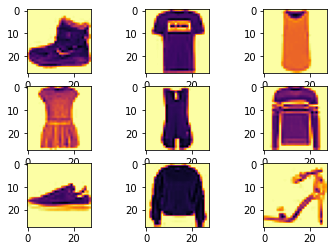

In [ ]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
for i in range (9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('inferno_r'))
plt.show()


In [ ]:
#chuyển chiều của x từ 3 chiều về 2 chiều
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
#Tạo mạng nơ-ron
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#translate model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])



In [ ]:
#chạy model với số lần học là 500 và độ kiên nhẫn là 100
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])


Epoch 1/500
375/375 [==============================] - 8s 20ms/step - loss: 0.2170 - accuracy: 0.9231 - val_loss: 0.4666 - val_accuracy: 0.8932
Epoch 2/500
375/375 [==============================] - 6s 16ms/step - loss: 0.2094 - accuracy: 0.9242 - val_loss: 0.5068 - val_accuracy: 0.8913
Epoch 3/500
375/375 [==============================] - 6s 15ms/step - loss: 0.2107 - accuracy: 0.9250 - val_loss: 0.4812 - val_accuracy: 0.8924
Epoch 4/500
375/375 [==============================] - 6s 15ms/step - loss: 0.2032 - accuracy: 0.9273 - val_loss: 0.5286 - val_accuracy: 0.8905
Epoch 5/500
375/375 [==============================] - 6s 16ms/step - loss: 0.2095 - accuracy: 0.9283 - val_loss: 0.5063 - val_accuracy: 0.8931
Epoch 6/500
375/375 [==============================] - 6s 15ms/step - loss: 0.2022 - accuracy: 0.9277 - val_loss: 0.5079 - val_accuracy: 0.8902
Epoch 7/500
375/375 [==============================] - 6s 16ms/step - loss: 0.2027 - accuracy: 0.9273 - val_loss: 0.5455 - val_accuracy:

In [ ]:
# Danh gia do chinh xac
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])


Test_loss 0.8083630800247192
Test accuracy 0.8809000253677368


In [ ]:
y_pred = model.predict(x_test)
print(y_pred.flatten)
print(y_test)


<built-in method flatten of numpy.ndarray object at 0x7f2cc538d7b0>
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


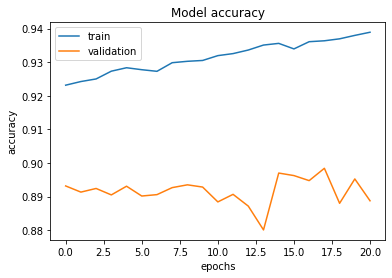

In [ ]:
#Ve do thi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()
